In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df=pd.read_csv("/Users/muhammetbakir/Desktop/udmy_veri_bilimi/videodan_bakip_yazdiklarim/data/1-studyhours.csv")
df

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7
5,18.0,78.8
6,19.2,77.1
7,22.2,90.8
8,25.2,99.0
9,17.4,84.6


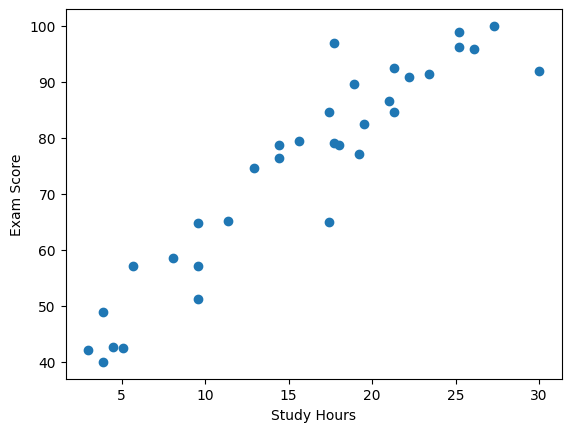

In [4]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score") #genelde bağımlı değişkeni y ekseninde görmek isterim
plt.show()

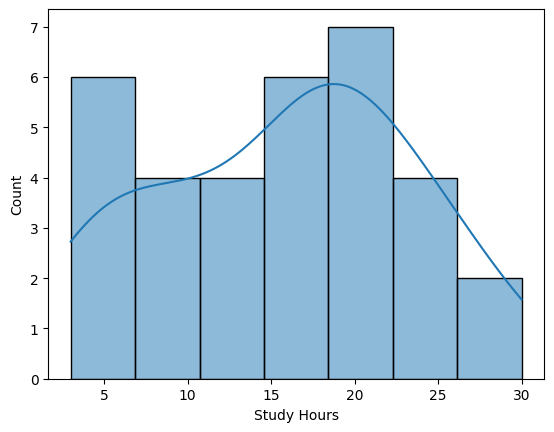

In [5]:
sns.histplot(df["Study Hours"],kde=True)
plt.show()

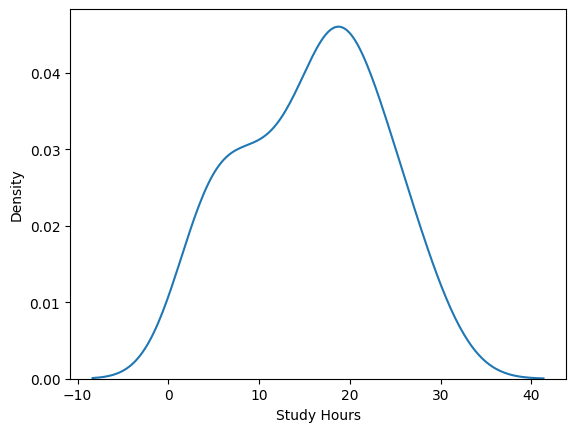

In [6]:
sns.kdeplot(df["Study Hours"])
plt.show()

In [35]:
X=df[["Study Hours"]]
y=df["Exam Score"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_tarin,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [10]:
#standardize the data set 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_tarin)
X_test=scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regression=LinearRegression()


In [16]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
print(regression.coef_)
print(regression.intercept_)


[16.17860223]
76.9076923076923


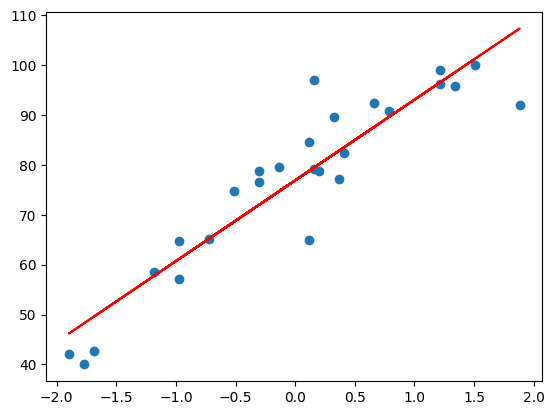

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train,),"r")
plt.show()

In [20]:
scaler.transform([[20]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [21]:
regression.predict(scaler.transform([[20]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [23]:
regression.predict(X_test)

array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
       48.23291515, 87.65093152])

In [24]:
y_pred_test=regression.predict(X_test) 
y_test   

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

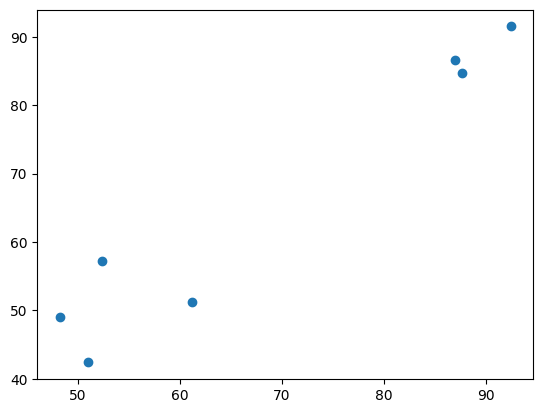

In [25]:
plt.scatter(y_pred_test,y_test)
plt.show()


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score,root_mean_squared_error

In [34]:

mae  = mean_absolute_error(y_test, y_pred_test)
mse  = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred_test)
mape = (np.abs((y_test - y_pred_test) / np.where(y_test == 0, 1e-9, y_test))).mean() * 100
medae = median_absolute_error(y_test, y_pred_test)
evs  = explained_variance_score(y_test, y_pred_test)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


print("-" * 45)
print(f"MAE   : {mae:.4f}")
print(f"MSE   : {mse:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"R²    : {r2:.4f}")
print(f"Adj R²: {adj_r2:.4f}")
print(f"MAPE  : {mape:.2f}%")
print(f"MedAE : {medae:.4f}")
print(f"EVS   : {evs:.4f}")
print("-" * 45)

---------------------------------------------
MAE   : 4.0549
MSE   : 29.4584
RMSE  : 5.4276
R²    : 0.9197
Adj R²: 0.9036
MAPE  : 7.80%
MedAE : 2.9509
EVS   : 0.9359
---------------------------------------------


In [ ]:
r2=r2_score(y_test,y_pred_test)
print(f"r2 score: {r2}")

In [ ]:
1- (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)